Simple Linear Regression
----

In [96]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

In [97]:
!pwd

/Users/jaichitra.balakrishnan/galvanizeu/DSCI6002-student/week_6/6_2_regression_II


In [98]:
def predict_mingrid(pop_t):
    (pop_t / 250) * 800000 - (pop_t * 30) * 12  

In [99]:
roi = pd.read_csv('/Users/jaichitra.balakrishnan/galvanizeu/DSCI6002-student/data/roi.csv')
roi.columns = [c.lower().replace(" ", "_") for c in utils.columns]
roi

,name_st,light_convert,paying_today,can_pay_in_future,activity_levl,mob_coverage,avg_roi_solarpanels,avg_roi_mini_grid_perregion_annual
0,Kachin,35.00,37.45,23.13,80.56,6.15,10811800,4665668440
1,Sagaing,41.28,36.52,24.90,81.52,4.47,53830000,15123985480
2,Yangon,24.65,41.56,16.38,85.31,13.10,46328080,20904396520
3,Kayah,28.92,35.58,25.92,76.84,5.60,1487440,814020680
4,Mon,39.78,33.26,18.76,80.07,7.03,19675000,5834476120
5,Shan,25.07,36.38,26.23,79.00,6.91,34690480,16541386880
6,Mandalay,36.82,40.19,19.42,83.47,8.77,57969640,17510653320
7,Bago,60.14,35.31,18.46,81.72,6.15,81985960,13823339320


In [100]:
roi_test = pd.read_csv('/Users/jaichitra.balakrishnan/galvanizeu/DSCI6002-student/data/roi.csv')
roi_test.columns = [c.lower().replace(" ", "_") for c in utils.columns]
roi_test

,name_st,light_convert,paying_today,can_pay_in_future,activity_levl,mob_coverage,avg_roi_solarpanels,avg_roi_mini_grid_perregion_annual
0,Kachin,35.00,37.45,23.13,80.56,6.15,10811800,4665668440
1,Sagaing,41.28,36.52,24.90,81.52,4.47,53830000,15123985480
2,Yangon,24.65,41.56,16.38,85.31,13.10,46328080,20904396520
3,Kayah,28.92,35.58,25.92,76.84,5.60,1487440,814020680
4,Mon,39.78,33.26,18.76,80.07,7.03,19675000,5834476120
5,Shan,25.07,36.38,26.23,79.00,6.91,34690480,16541386880
6,Mandalay,36.82,40.19,19.42,83.47,8.77,57969640,17510653320
7,Bago,60.14,35.31,18.46,81.72,6.15,81985960,13823339320


In [101]:
rf1 = roi_test.ix[:,1:6]

In [102]:
rf1

,light_convert,paying_today,can_pay_in_future,activity_levl,mob_coverage
0,35.00,37.45,23.13,80.56,6.15
1,41.28,36.52,24.90,81.52,4.47
2,24.65,41.56,16.38,85.31,13.10
3,28.92,35.58,25.92,76.84,5.60
4,39.78,33.26,18.76,80.07,7.03
5,25.07,36.38,26.23,79.00,6.91
6,36.82,40.19,19.42,83.47,8.77
7,60.14,35.31,18.46,81.72,6.15


In [103]:
results = smf.ols(formula="avg_roi_solarpanels ~ light_convert + paying_today + activity_levl + can_pay_in_future + mob_coverage", data=roi).fit()
results.summary()

/Users/jaichitra.balakrishnan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     avg_roi_solarpanels   R-squared:                       0.930
Model:                             OLS   Adj. R-squared:                  0.756
Method:                  Least Squares   F-statistic:                     5.349
Date:                 Sun, 02 Apr 2017   Prob (F-statistic):              0.165
Time:                         23:25:42   Log-Likelihood:                -137.02
No. Observations:                    8   AIC:                             286.0
Df Residuals:                        2   BIC:                             286.5
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept         -1.127e+09   3.98e+08     -2.833      0.105     -2.84e+09  5.85e+08
light_convert      4.166e+06   1.35e+06      3.088      0.091     -1.64e+06  9.97e+06
paying_today      -5.068e+06   5.23e+06     -0.969      0.435     -2.76e+07  1.74e+07
activity_levl      9.249e+06   5.65e+06      1.638      0.243      -1.5e+07  3.35e+07
can_pay_in_future  1.396e+07   5.67e+06      2.463      0.133     -1.04e+07  3.84e+07
mob_coverage       2.051e+07   9.37e+06      2.188      0.160     -1.98e+07  6.08e+07
==============================================================================
Omnibus:                        1.067   Durbin-Watson:                   1.527
Prob(Omnibus):                  0.586   Jarque-Bera (JB):                0.004
Skew:                          -0.055   Prob(JB):                        0.998
Kurtosis:                       3.006   Cond. No.                     8.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
results1 = smf.ols(formula="avg_roi_mini_grid_perregion_annual ~ light_convert + paying_today + activity_levl + can_pay_in_future + mob_coverage", data=roi).fit()
results1.summary()

/Users/jaichitra.balakrishnan/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1327: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                    OLS Regression Results                                    
==============================================================================================
Dep. Variable:     avg_roi_mini_grid_perregion_annual   R-squared:                       0.921
Model:                                            OLS   Adj. R-squared:                  0.722
Method:                                 Least Squares   F-statistic:                     4.643
Date:                                Sun, 02 Apr 2017   Prob (F-statistic):              0.187
Time:                                        23:25:43   Log-Likelihood:                -182.23
No. Observations:                                   8   AIC:                             376.5
Df Residuals:                                       2   BIC:                             376.9
Df Model:                                           5                                         
Covariance Type:                            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [95.0% Conf. Int.]
-------------------------------------------------------------------------------------
Intercept         -4.009e+11   1.13e+11     -3.541      0.071     -8.88e+11  8.62e+10
light_convert      7.068e+08   3.84e+08      1.841      0.207     -9.45e+08  2.36e+09
paying_today      -2.434e+09   1.49e+09     -1.636      0.243     -8.83e+09  3.97e+09
activity_levl      4.142e+09   1.61e+09      2.578      0.123     -2.77e+09  1.11e+10
can_pay_in_future  4.451e+09   1.61e+09      2.759      0.110     -2.49e+09  1.14e+10
mob_coverage       6.187e+09   2.67e+09      2.320      0.146     -5.29e+09  1.77e+10
==============================================================================
Omnibus:                        1.089   Durbin-Watson:                   1.217
Prob(Omnibus):                  0.580   Jarque-Bera (JB):                0.416
Skew:                           0.524   Prob(JB):                        0.812
Kurtosis:                       2.614   Cond. No.                     8.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [106]:
roit = pd.read_csv('/Users/jaichitra.balakrishnan/galvanizeu/DSCI6002-student/data/roi_test.csv')
roit.columns = [c.lower().replace(" ", "_") for c in utils.columns]
roit

,name_st,light_convert,paying_today,can_pay_in_future,activity_levl,mob_coverage,avg_roi_solarpanels,avg_roi_mini_grid_perregion_annual
0,Nay Pyi Taw,39.21,41.31,18.99,81.34,10.20,11840440,3295087280
1,Chin,44.38,19.29,36.61,72.57,3.25,4352200,1359794840
2,Kayin,57.52,28.07,22.24,76.36,5.19,20761360,4272285840
3,Tanintharyi,40.46,34.71,19.33,77.81,6.00,13245520,3999858840
4,Rakhine,74.59,28.87,22.60,80.57,3.47,40651360,5960611880
5,Magway,49.71,36.67,24.07,82.51,5.60,54362920,11124436200
6,Ayeyarwady,77.05,36.33,18.25,80.76,4.62,137180200,17564914360


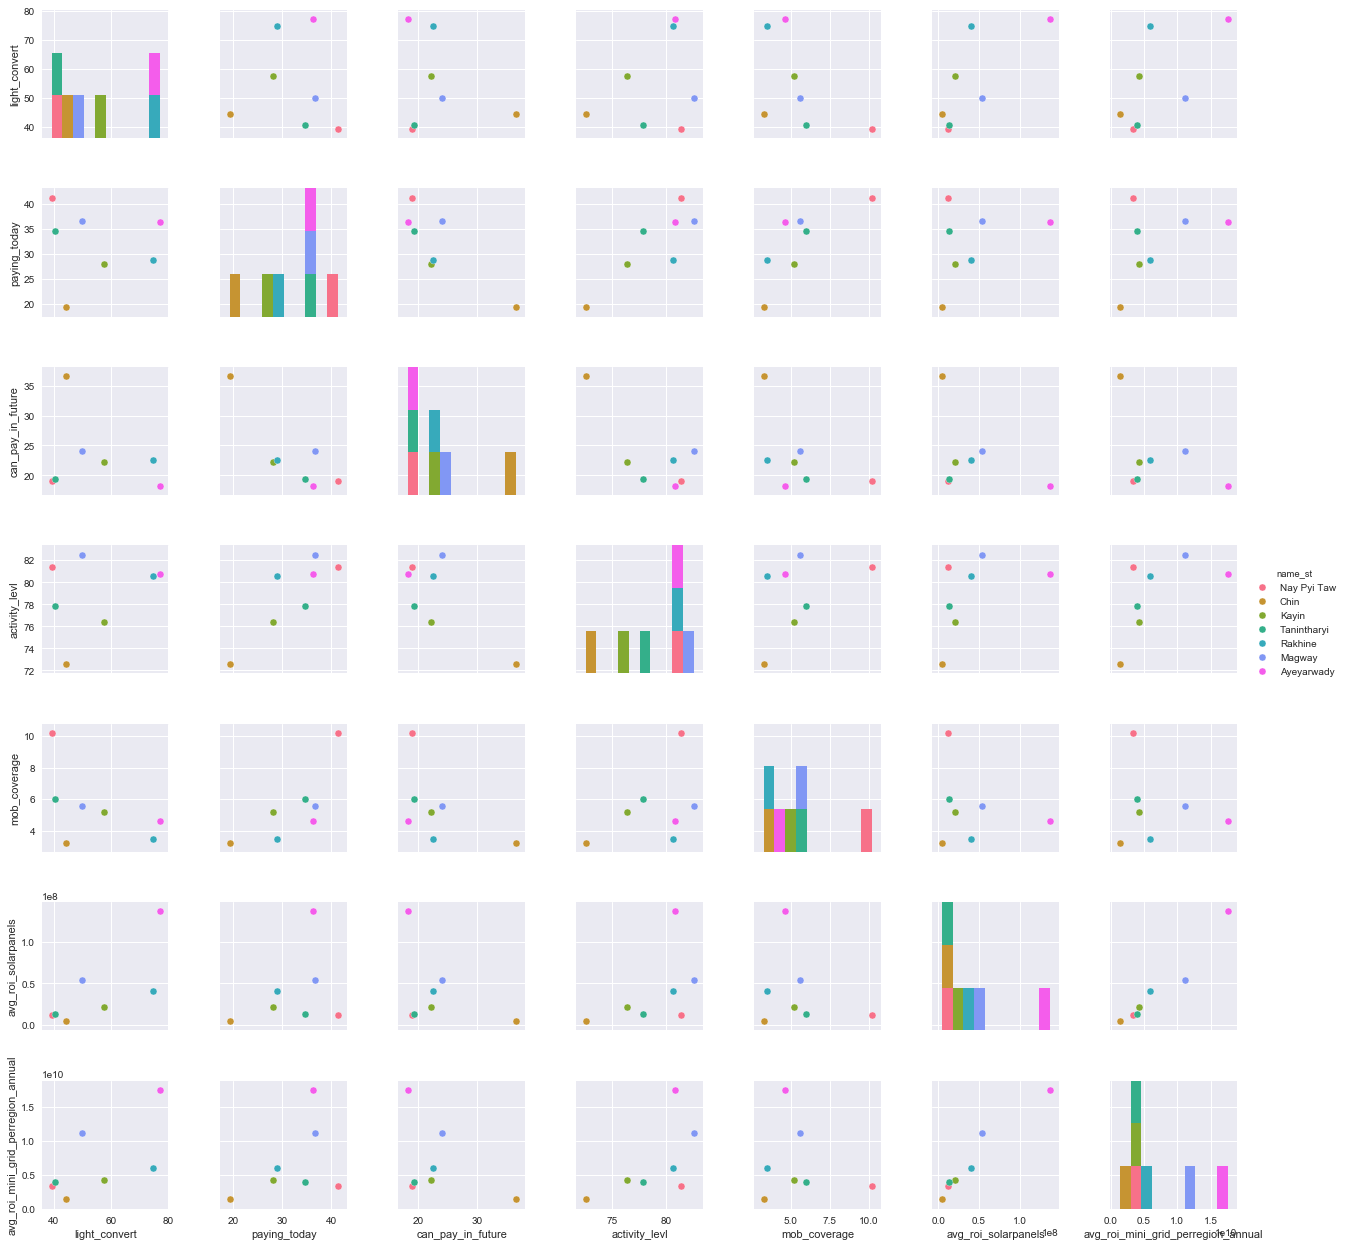

In [107]:
import seaborn as sns
sns.set()
sns.pairplot(roit, hue="name_st")